# Agro

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Load Dataset

In [5]:
df = pd.read_csv("../datasets/Agrofood_co2_emission.csv")
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [4]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


## Rename Column

In [ ]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
      .str.replace(r"[()°]", "", regex=True)
)

## Exploratory Data Analysis

In [14]:
df.isnull().sum()

area                                  0
year                                  0
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
rice_cultivation                      0
drained_organic_soils_co2             0
pesticides_manufacturing              0
food_transport                        0
forestland                          493
net_forest_conversion               493
food_household_consumption          473
food_retail                           0
on_farm_electricity_use               0
food_packaging                        0
agrifood_systems_waste_disposal       0
food_processing                       0
fertilizers_manufacturing             0
ippu                                743
manure_applied_to_soils             928
manure_left_on_pasture                0
manure_management                   928
fires_in_organic_soils                0
fires_in_humid_tropical_forests     155
on_farm_energy_use                  956


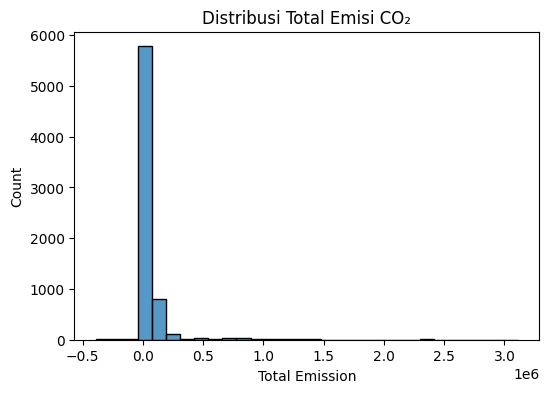

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['total_emission'], bins=30)
plt.title("Distribusi Total Emisi CO₂")
plt.xlabel("Total Emission")
plt.show()

## Feature Important

In [ ]:
selected_features = [
    'savanna_fires',
    'forest_fires',
    'crop_residues',
    'rice_cultivation',
    'food_transport',
    'food_processing',
    'manure_management',
    'on_farm_energy_use',
    'rural_population',
    'urban_population',
    'total_emission',
    'avg_temperature_c'
]

data = df[selected_features]
data.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,food_transport,food_processing,manure_management,on_farm_energy_use,rural_population,urban_population,total_emission,avg_temperature_c
0,14.7237,0.0557,205.6077,686.00,63.1152,252.21419,319.1763,NaN,9655167.0,2593947.0,2198.963539,0.536167
1,14.7237,0.0557,209.4971,678.16,61.2125,252.21419,342.3079,NaN,10230490.0,2763167.0,2323.876629,0.020667
2,14.7237,0.0557,196.5341,686.00,53.3170,252.21419,349.1224,NaN,10995568.0,2985663.0,2356.304229,-0.259583
3,14.7237,0.0557,230.8175,686.00,54.3617,252.21419,352.2947,NaN,11858090.0,3237009.0,2368.470529,0.101917
4,14.7237,0.0557,242.0494,705.60,53.9874,252.21419,367.6784,NaN,12690115.0,3482604.0,2500.768729,0.372250


## Missing values

In [17]:
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25324\949118645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num_cols] = data[num_cols].fillna(data[num_cols].median())


## Update data frame

In [18]:
data = df[selected_features]
data.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,food_transport,food_processing,manure_management,on_farm_energy_use,rural_population,urban_population,total_emission,avg_temperature_c
0,14.7237,0.0557,205.6077,686.00,63.1152,252.21419,319.1763,NaN,9655167.0,2593947.0,2198.963539,0.536167
1,14.7237,0.0557,209.4971,678.16,61.2125,252.21419,342.3079,NaN,10230490.0,2763167.0,2323.876629,0.020667
2,14.7237,0.0557,196.5341,686.00,53.3170,252.21419,349.1224,NaN,10995568.0,2985663.0,2356.304229,-0.259583
3,14.7237,0.0557,230.8175,686.00,54.3617,252.21419,352.2947,NaN,11858090.0,3237009.0,2368.470529,0.101917
4,14.7237,0.0557,242.0494,705.60,53.9874,252.21419,367.6784,NaN,12690115.0,3482604.0,2500.768729,0.372250


## Missing Value

In [19]:
data.isnull().sum()

savanna_fires           31
forest_fires            93
crop_residues         1389
rice_cultivation         0
food_transport           0
food_processing          0
manure_management      928
on_farm_energy_use     956
rural_population         0
urban_population         0
total_emission           0
avg_temperature_c        0
dtype: int64

In [20]:
data = data.fillna(data.median())

In [21]:
data.isnull().sum()

savanna_fires         0
forest_fires          0
crop_residues         0
rice_cultivation      0
food_transport        0
food_processing       0
manure_management     0
on_farm_energy_use    0
rural_population      0
urban_population      0
total_emission        0
avg_temperature_c     0
dtype: int64

## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = data.copy()
scaled_data[:] = scaler.fit_transform(data)

scaled_data.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,food_transport,food_processing,manure_management,on_farm_energy_use,rural_population,urban_population,total_emission,avg_temperature_c
0,-0.223195,-0.245368,-0.184577,-0.202904,-0.334108,-0.182515,-0.225005,-0.210056,-0.092155,-0.218111,-0.271105,-0.605916
1,-0.223195,-0.245368,-0.183409,-0.203350,-0.334447,-0.182515,-0.221904,-0.210056,-0.085691,-0.215536,-0.270558,-1.533258
2,-0.223195,-0.245368,-0.187302,-0.202904,-0.335853,-0.182515,-0.220991,-0.210056,-0.077095,-0.212152,-0.270416,-2.037405
3,-0.223195,-0.245368,-0.177006,-0.202904,-0.335667,-0.182515,-0.220566,-0.210056,-0.067405,-0.208329,-0.270362,-1.387096
4,-0.223195,-0.245368,-0.173633,-0.201792,-0.335733,-0.182515,-0.218504,-0.210056,-0.058057,-0.204593,-0.269783,-0.900789


## Normalization (min-max)

In [23]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalized_data = data.copy()
normalized_data[:] = normalizer.fit_transform(data)

normalized_data.head()

,savanna_fires,forest_fires,crop_residues,rice_cultivation,food_transport,food_processing,manure_management,on_farm_energy_use,rural_population,urban_population,total_emission,avg_temperature_c
0,0.000128,0.000001,0.006139,0.004160,0.000929,0.00092,0.004515,0.000567,0.010727,0.002876,0.112370,0.392447
1,0.000128,0.000001,0.006255,0.004112,0.000901,0.00092,0.004843,0.000567,0.011366,0.003063,0.112406,0.288807
2,0.000128,0.000001,0.005868,0.004160,0.000785,0.00092,0.004939,0.000567,0.012216,0.003310,0.112415,0.232463
3,0.000128,0.000001,0.006892,0.004160,0.000800,0.00092,0.004984,0.000567,0.013174,0.003588,0.112419,0.305142
4,0.000128,0.000001,0.007227,0.004279,0.000795,0.00092,0.005202,0.000567,0.014099,0.003861,0.112457,0.359492


## Handling Outliers

### outliers

In [28]:
outlier_cols = [
    'crop_residues',
    'forest_fires',
    'manure_management',
    'on_farm_energy_use',
    'total_emission'
]

### Visual

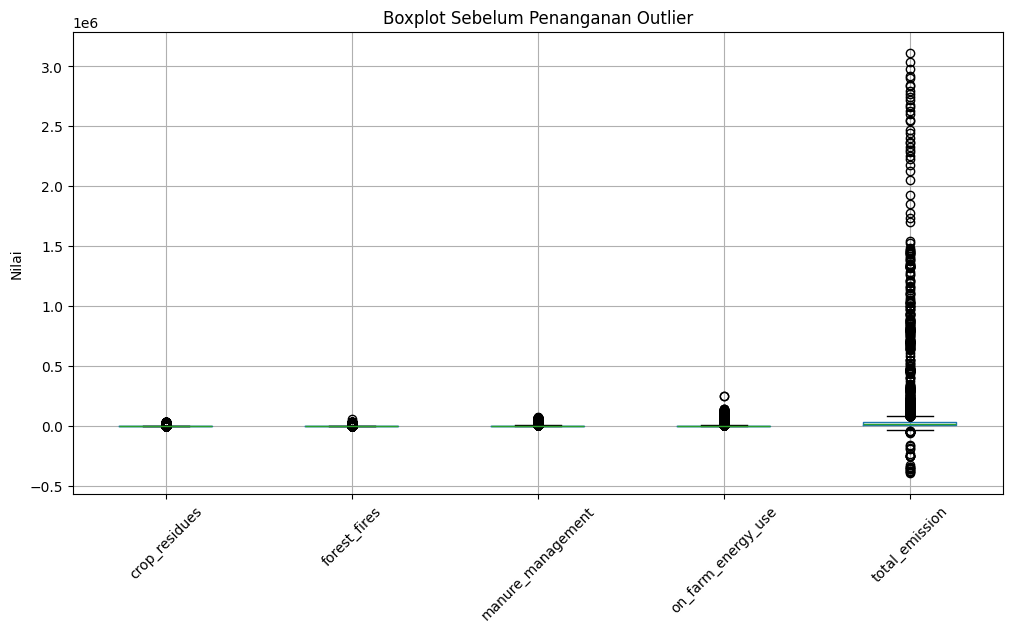

In [29]:
plt.figure(figsize=(12,6))
data[outlier_cols].boxplot()
plt.title("Boxplot Sebelum Penanganan Outlier")
plt.xticks(rotation=45)
plt.ylabel("Nilai")
plt.show()

### Handing IQR

In [38]:
Q1 = data[outlier_cols].quantile(0.25)
Q3 = data[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

filtered_data = data[~(
    (data[outlier_cols] < (Q1 - 1.5 * IQR)) |
    (data[outlier_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)]

### After handling outliers

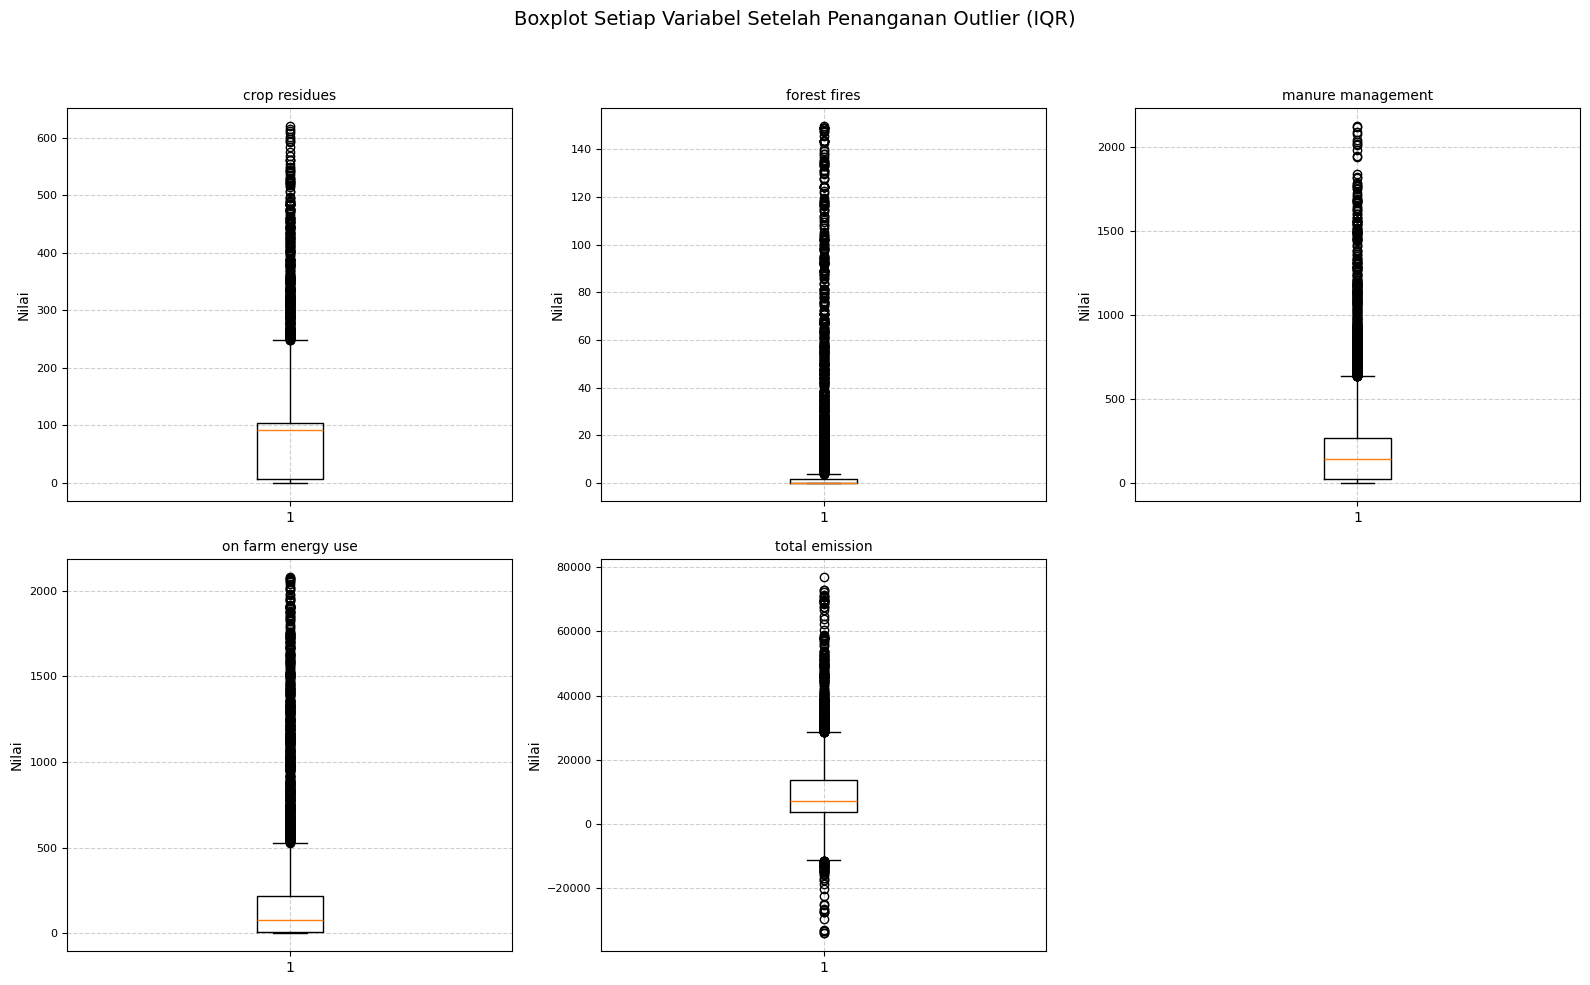

In [37]:
n_cols = 3
n_rows = (len(outlier_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(outlier_cols):
    axes[i].boxplot(filtered_data[col], vert=True)
    axes[i].set_title(col.replace('_', ' '), fontsize=10)
    axes[i].set_ylabel("Nilai")
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# hapus subplot kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(
    "Boxplot Setiap Variabel Setelah Penanganan Outlier (IQR)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Feature Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

df['area_encoded'] = LabelEncoder().fit_transform(df['area'])
df[['area', 'area_encoded']].head()

,area,area_encoded
0,Afghanistan,0
1,Afghanistan,0
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0
